# Explore here

In [1]:
# Your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [2]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

In [3]:
df_raw.sample(10)

,age,sex,bmi,children,smoker,region,charges
595,46,female,33.725,1,no,northeast,8823.98575
194,18,male,34.430,0,no,southeast,1137.46970
619,55,female,37.100,0,no,southwest,10713.64400
341,62,male,30.020,0,no,northwest,13352.09980
978,45,female,39.995,3,no,northeast,9704.66805
950,57,male,18.335,0,no,northeast,11534.87265
350,57,female,23.180,0,no,northwest,11830.60720
385,19,male,34.400,0,no,southwest,1261.85900
537,46,female,30.200,2,no,southwest,8825.08600
110,54,male,33.630,1,no,northwest,10825.25370


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
df_raw.to_csv('../data/raw/coffee.csv')

In [7]:
df_interim = df_raw.copy()
df_interim = df_interim.dropna()


In [8]:
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df_interim['sex'] = pd.Categorical(df_interim['sex'])
df_interim['smoker'] = pd.Categorical(df_interim['smoker'])
df_interim['region'] = pd.Categorical(df_interim['region'])

df_interim.to_csv('../data/interim/coffee_model_interim.csv')
df = df_interim.copy()
df= df.drop(['region'], axis=1)

In [10]:
X = df.copy().drop(['charges'], axis=1)
y = df['charges']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=2007)
df_train = pd.concat([X_train,y_train], axis=1)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 1229 to 379
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1003 non-null   int64   
 1   sex       1003 non-null   category
 2   bmi       1003 non-null   float64 
 3   children  1003 non-null   int64   
 4   smoker    1003 non-null   category
 5   charges   1003 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 41.4 KB


In [13]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1003.0,NaN,NaN,NaN,39.611167,13.931124,18.0,27.0,40.0,51.0,64.0
sex,1003,2,male,515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1003.0,NaN,NaN,NaN,30.748814,6.16174,15.96,26.21,30.4,34.8,53.13
children,1003.0,NaN,NaN,NaN,1.075773,1.193061,0.0,0.0,1.0,2.0,5.0
smoker,1003,2,no,796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1003.0,NaN,NaN,NaN,13336.75274,11990.428445,1121.8739,4811.780875,9500.57305,17064.3045,63770.42801


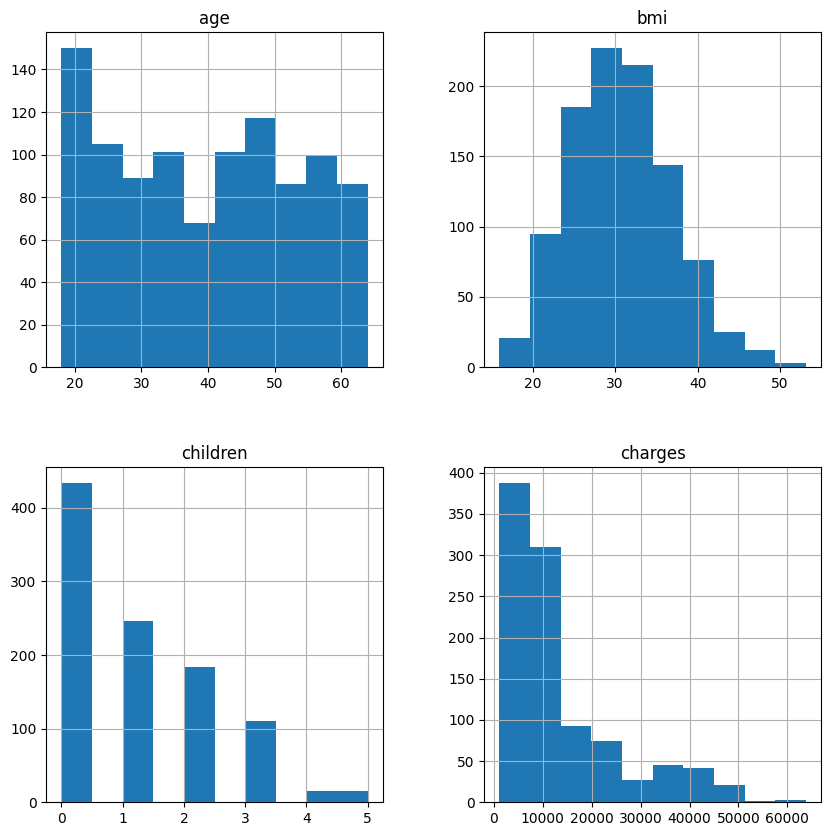

In [14]:
df_train.hist(figsize=(10,10))
plt.show()

/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


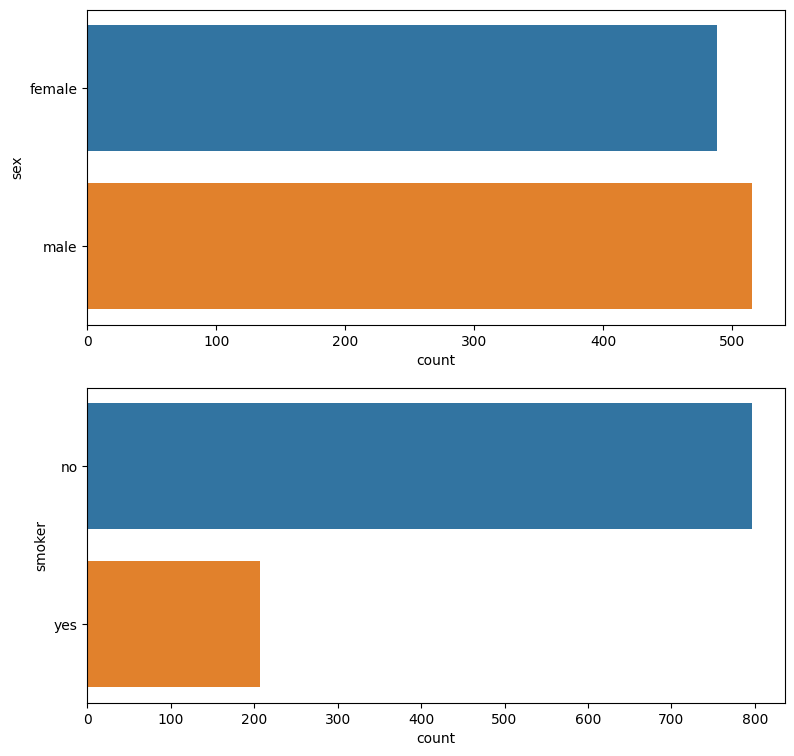

In [15]:
cats = df_train.select_dtypes('category')
fig,ax = plt.subplots(2,1,figsize=(9,9))
axs = ax.flatten() 
for i in range(len(axs)):
    sns.countplot(data=cats, y=cats.columns.to_list()[i], ax=axs[i])
plt.show()

/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


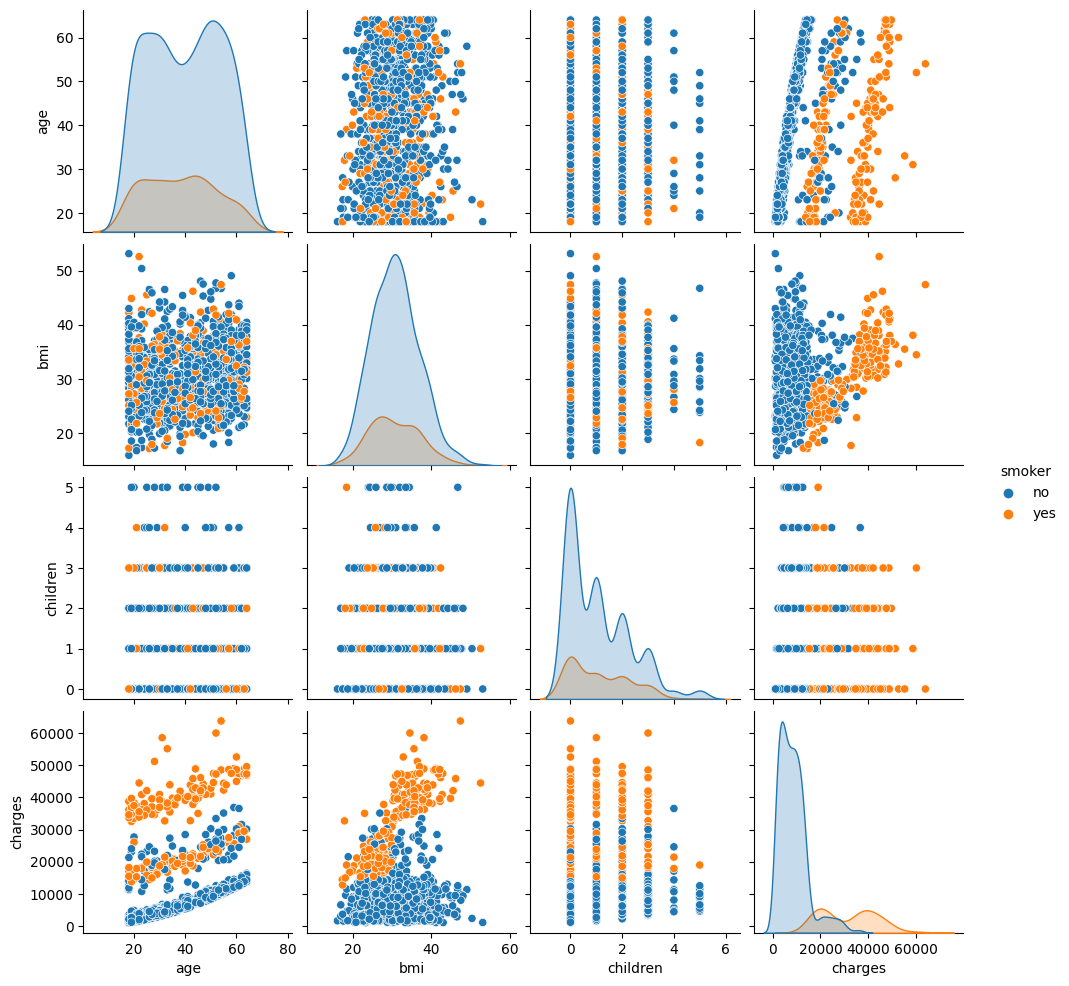

In [16]:
sns.pairplot(data=df_train, hue='smoker')
plt.show()

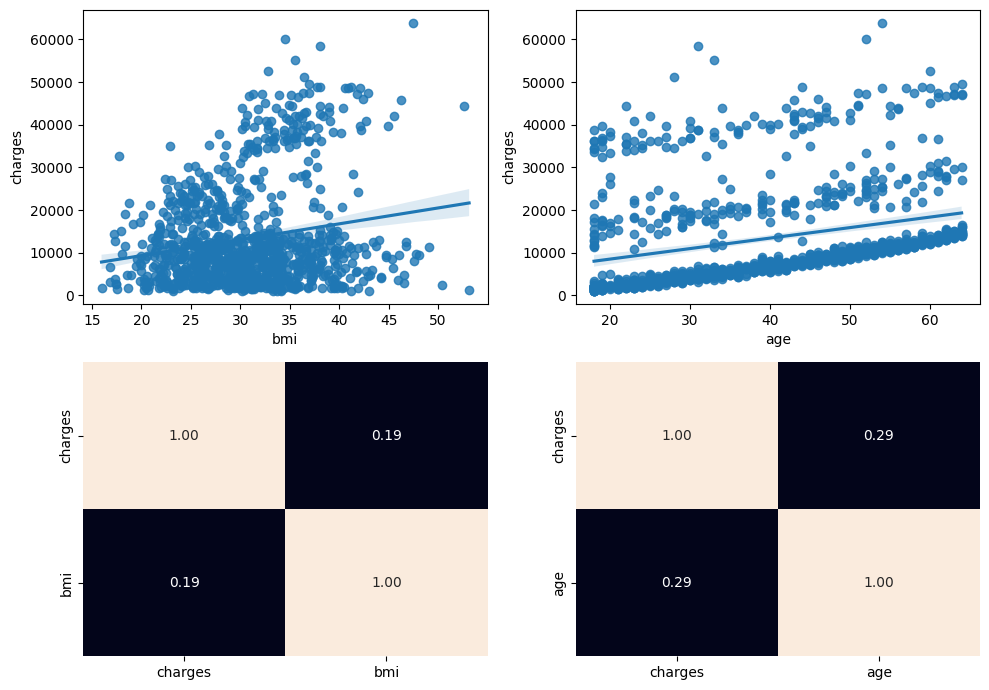

In [17]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = df_train, x = "bmi", y = "charges")
sns.heatmap(df_train[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df_train, x = "age", y = "charges")
sns.heatmap(df_train[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

plt.tight_layout()

plt.show()

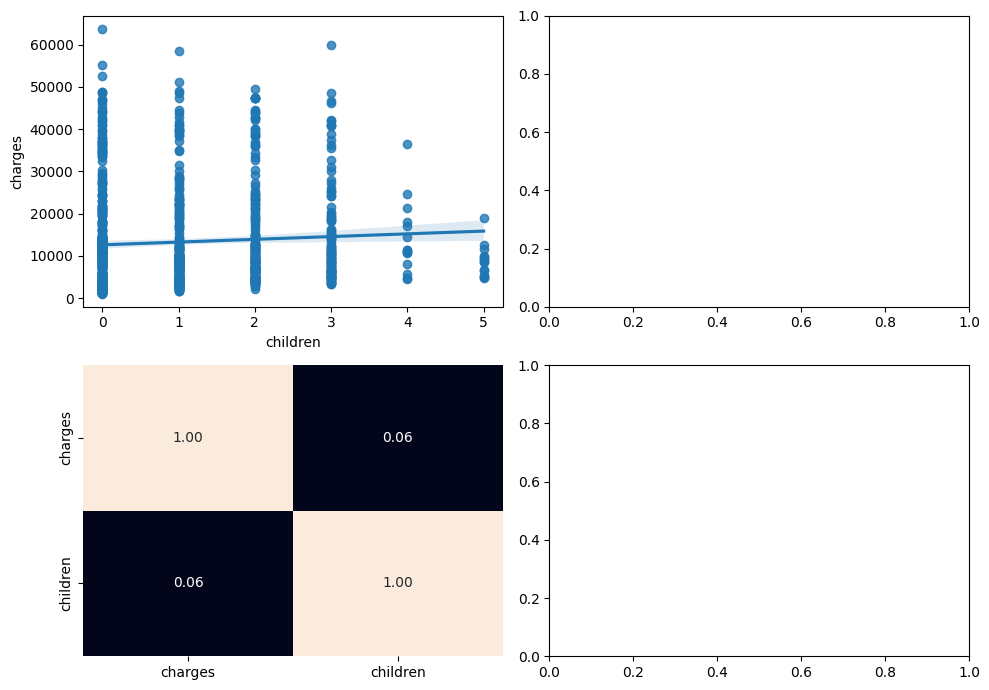

In [18]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = df_train, x = "children", y = "charges")
sns.heatmap(df_train[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

plt.tight_layout()

plt.show()

In [19]:
cat_cols = X_train.select_dtypes('category').columns
num_cols = X_train.select_dtypes('number').columns

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False))
])
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_cols),
    ('num', num_transformer, num_cols)
])

In [24]:
linear = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])
linear.fit(X_train,y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['sex', 'smoker'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'bmi', 'children'], dtype='object'))])),
                ('classifier', LinearRegression())])

In [25]:
y_hat = linear.predict(X_test)

In [26]:
print(f"mean squared error (MSE): {mean_squared_error(y_hat, y_test)}")
print(f"coefficient of determination (r2): { r2_score(y_hat, y_test)}")

mean squared error (MSE): 34661432.884755604
coefficient of determination (r2): 0.6938874139860725
